In [1]:
import os
import time
import argparse
import datetime
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
from model import AlexNet, ResNet18, ResNet50
from utils import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from utils import accuracy_score, plot_class_accuracy

In [2]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def model_accuracy(net):
    test_data = torchvision.datasets.Food101(root="./data",
                                        split="test",
                                        transform=net.transform,
                                        )

    test_dataloader = torch.utils.data.DataLoader(test_data, 
                                                batch_size=128, 
                                                shuffle=False, 
                                                num_workers=4)
    acc, class_acc = accuracy_score(net, test_dataloader, gpu=True)
    return acc, class_acc


def plot_class_accuracy(class_acc_df, sort_by='resnet50'):
    #class_acc = sorted(class_acc, key=lambda x: x[1])
    class_acc_df = class_acc_df.sort_values('resnet50')
    classes = class_acc_df.index
    fig, ax = plt.subplots(figsize=(10,int(len(classes)/5)))
    for x in ['resnet50', 'resnet18', 'alexnet']:
        ax.barh(class_acc_df.index, class_acc_df[x], alpha=0.4, align='center',label=x)
        ax.legend()
    ax.set_xlabel("Accuracy %")
    ax.set_title("Model Performance by Class")
    
    plt.margins(0.005, 0.005)
    plt.show()


In [3]:
PATH = f"./models/alexnet.pth"
alexnet = AlexNet()
alexnet.load_state_dict(torch.load(PATH))
alexnet.eval()
print("AlexNet")
print(f"Number of Parameters: {count_parameters(alexnet)}")
print("-"*10)



PATH = f"./models/resnet18.pth"
resnet18 = ResNet18()
resnet18.load_state_dict(torch.load(PATH))
resnet18.eval()
print("ResNet18")
print(f"Number of Parameters: {count_parameters(resnet18)}")
print("-"*10)

PATH = f"./models/resnet50.pth"
resnet50 = ResNet50()
resnet50.load_state_dict(torch.load(PATH))
resnet50.eval()
print("ResNet50")
print(f"Number of Parameters: {count_parameters(resnet50)}")
print("")

AlexNet
Number of Parameters: 57417637
----------
ResNet18
Number of Parameters: 11228325
----------
ResNet50
Number of Parameters: 23714981



In [4]:
an_acc, an_class_acc = model_accuracy(alexnet)
rn18_acc, rn18_class_acc = model_accuracy(resnet18)
rn50_acc, rn50_class_acc = model_accuracy(resnet50)

class_acc_df = pd.DataFrame(
    {'alexnet':[x[1] for x in an_class_acc],
     'resnet18':[x[1] for x in rn18_class_acc],
     'resnet50':[x[1] for x in rn50_class_acc]},
                            
    index=[x[0] for x in an_class_acc])

In [5]:
print(f"Test Set Accuracy: {round(100*rn50_acc, 3)}%")

Test Set Accuracy: 78.859%


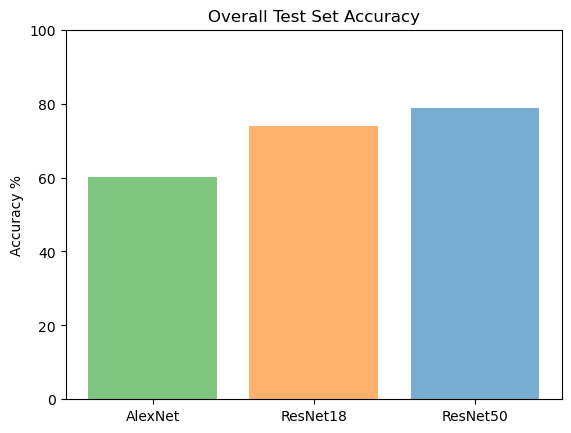

In [6]:
plt.bar(['AlexNet','ResNet18','ResNet50'],
        [an_acc*100,rn18_acc*100,rn50_acc*100],alpha=0.6, 
        color=['tab:green','tab:orange','tab:blue'],)
plt.ylim(0,100)
plt.title("Overall Test Set Accuracy")
plt.ylabel("Accuracy %")
plt.show()

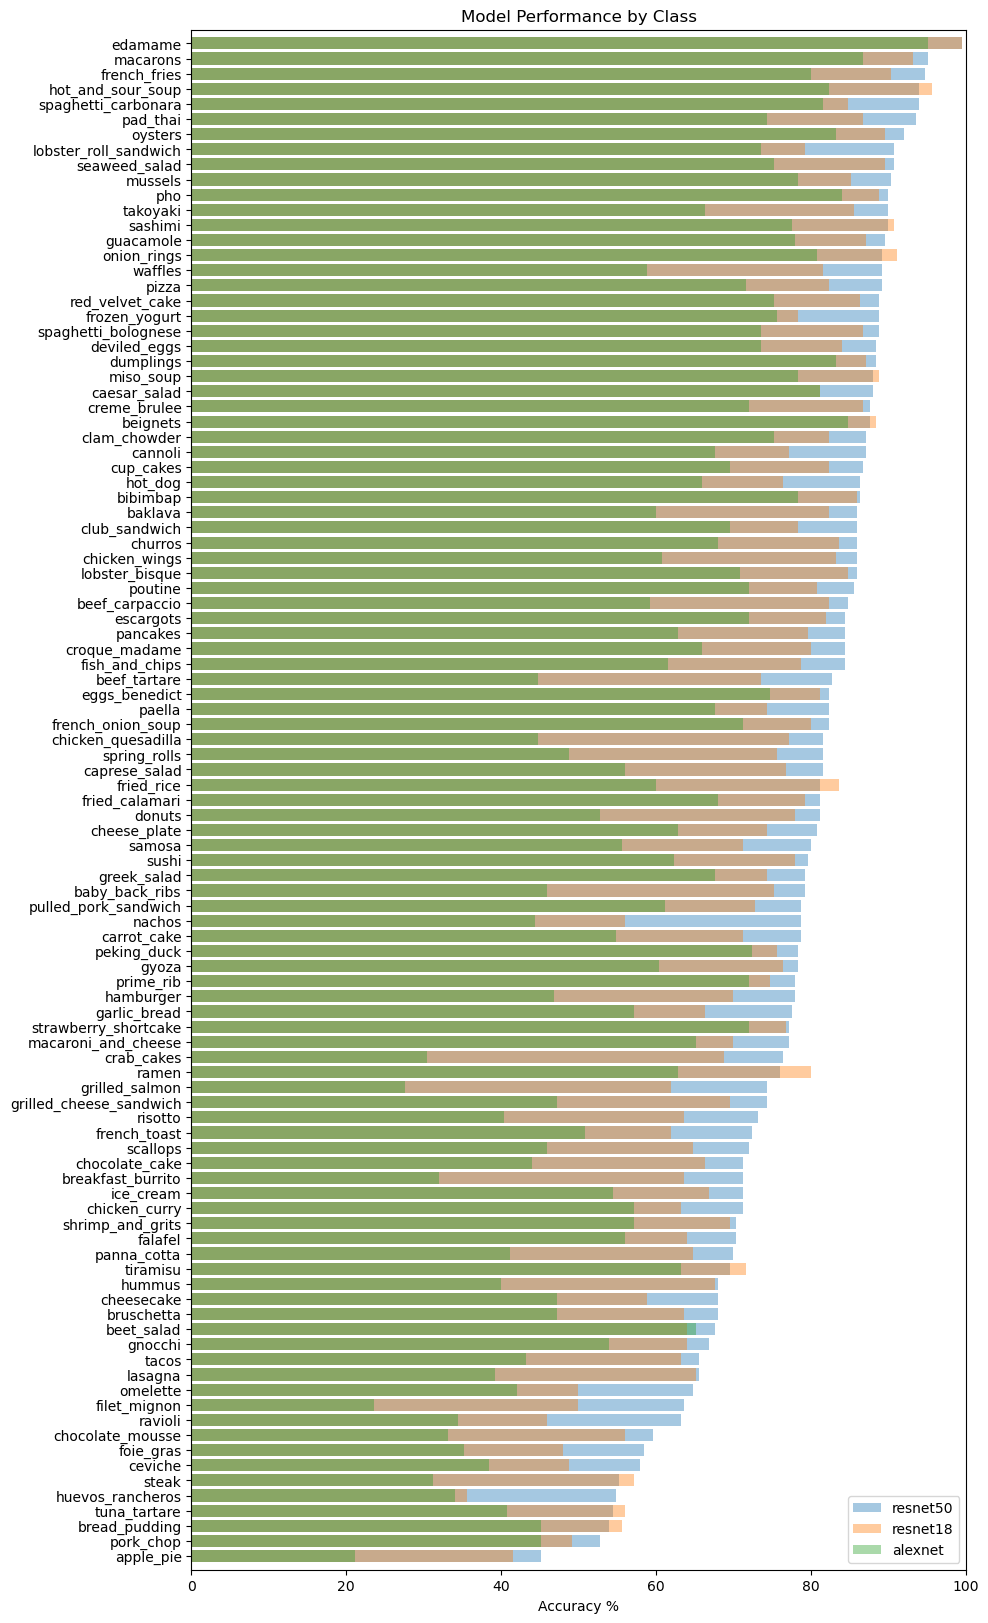

In [7]:
plot_class_accuracy(class_acc_df)